In [1]:
# Linear Regression
# Humberto Barrantes
# 09-2020

In [2]:
# imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.model_selection import train_test_split

In [3]:
# Load the data

# Dow Jones
dowjones = pd.read_csv("data/DowJones.csv")

# Nasdaq
nasdaq = pd.read_csv("data/Nasdaq.csv")

# S&P
sandp = pd.read_csv("data/S&P.csv")

In [4]:
dowjones.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
3,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
4,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000


In [5]:
for dataset in [dowjones, nasdaq, sandp]:
    
    # convert each date from str to datetime
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    
    # remove 2020
    # data = data[data.date < datetime.datetime(2020, 1, 1)]
    
    # convert each datetime to int
    dataset['Date'] = dataset['Date'].map(datetime.datetime.toordinal)

In [6]:
dowjones.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2.690000e+03
mean,735725.342751,18147.259709,18241.705598,18047.207977,18151.395040,18151.395040,2.060105e+08
std,1127.298153,5430.726541,5454.521915,5403.064637,5428.630820,5428.630820,1.340573e+08
min,733776.000000,9686.480469,9770.870117,9614.320313,9686.480469,9686.480469,8.410000e+06
25%,734747.000000,13115.889893,13190.109619,13073.642578,13119.287354,13119.287354,1.050500e+08
50%,735725.500000,17452.915039,17561.044922,17344.225586,17462.735352,17462.735352,1.623950e+08
75%,736701.250000,23525.508301,23601.384278,23353.902832,23512.532227,23512.532227,2.815375e+08
max,737677.000000,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09


In [7]:
# correlation? 

corr = sandp.corr()
corr.style.background_gradient(cmap='plasma').set_precision(2)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.00,0.98,0.98,0.98,0.98,0.98,-0.04
Open,0.98,1.00,1.00,1.00,1.00,1.00,-0.08
High,0.98,1.00,1.00,1.00,1.00,1.00,-0.07
Low,0.98,1.00,1.00,1.00,1.00,1.00,-0.09
Close,0.98,1.00,1.00,1.00,1.00,1.00,-0.08
Adj Close,0.98,1.00,1.00,1.00,1.00,1.00,-0.08
Volume,-0.04,-0.08,-0.07,-0.09,-0.08,-0.08,1.00


In [8]:
# split features and labels

X_dowjones = np.array(dowjones[['Date','Open','High','Low','Volume']])
y_dowjones = np.array(dowjones['Close'])

X_nasdaq = np.array(nasdaq[['Date','Open','High','Low','Volume']])
y_nasdaq = np.array(nasdaq['Close'])

X_sandp = np.array(sandp[['Date','Open','High','Low','Volume']])
y_sandp = np.array(sandp['Close'])

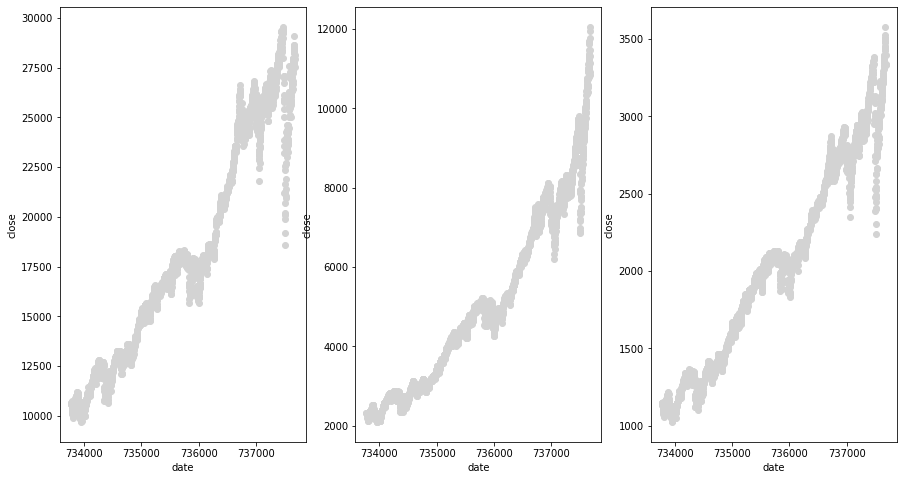

In [9]:
# Do some plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(X_dowjones.T[0], y_dowjones, c='lightgray')
ax1.set_xlabel("date")
ax1.set_ylabel("close")

ax2.scatter(X_nasdaq.T[0], y_nasdaq, c='lightgray')
ax2.set_xlabel("date")
ax2.set_ylabel("close")

ax3.scatter(X_sandp.T[0], y_sandp, c='lightgray')
ax3.set_xlabel("date")
ax3.set_ylabel("close")

plt.show()